# We are going to to time series analysis on Brent Oil Prices dataset to find the best forecast model to predict the oil prices.

# ================= Import libraries =======================

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import statsmodels.api as sm
import math
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
import TS_Helper as helper
import statsmodels.tsa.holtwinters as ets
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from datetime import datetime

np.random.seed(100)

# ================= Import dataset =======================

In [27]:

df = pd.read_csv('BrentOilPrices.csv')


# ================= Data Cleaning =======================



In [28]:
print(df.isnull().sum())

date = []
for i in range(8360):
    date.append(datetime.strptime(df.iloc[i,0],'%d-%b-%y'))

for i in range(8360,len(df)):
    date.append(datetime.strptime(df.iloc[i, 0], '%b %d, %Y'))

df['time_new'] = date

y = df['Price']
time= df['time_new']

Date     0
Price    0
dtype: int64


# =================== Prices vs time plot ==================



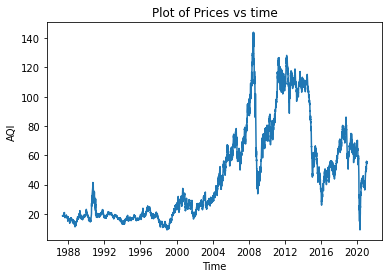

In [29]:

plt.plot(time,y)
plt.title('Plot of Prices vs time')
plt.xlabel('Time')
# plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.show()


# ================= Auto Correlation plot ====================



/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


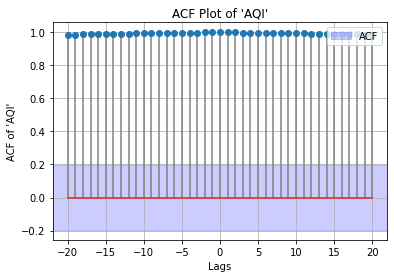

In [30]:

lags=20

acf3 = acf(y, nlags=lags)
plt.stem(np.arange(-lags, lags+1 ), np.hstack(((acf3[::-1])[:-1],acf3)), linefmt='grey', markerfmt='o')
m = 1.96 / np.sqrt(100)
plt.axhspan(-m, m, alpha=.2, color='blue')
plt.title("ACF Plot of 'AQI'")
plt.xlabel("Lags")
plt.ylabel("ACF of 'AQI'")
plt.grid()
plt.legend(["ACF"], loc='upper right')
plt.show()


# ================== ACF/PACF plot ======================

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


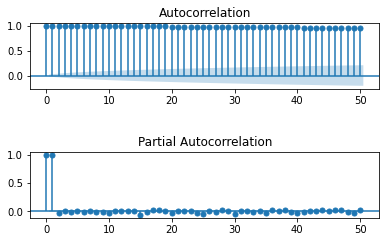

In [31]:

helper.ACF_PACF_Plot(y,50,'AQI')


# ================= Stationarity Check ===================

In [32]:

# ADF plot
helper.ADF_Cal(y)

print('\n')

# KPSS plot
helper.kpss_test(y)


ADF Statistic: -2.119950
p-value: 0.236569
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Results of KPSS Test:
Test Statistic            9.128238
p-value                   0.010000
Lags Used                56.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic            9.128238
p-value                   0.010000
Lags Used                56.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

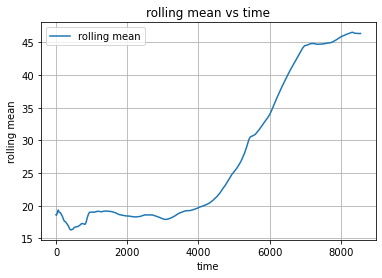

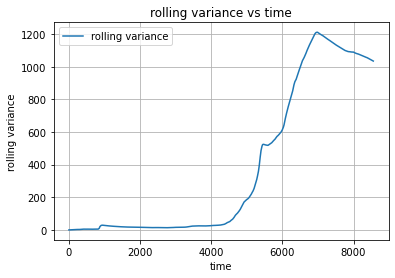

In [33]:
# rolling average
rol_m = helper.rolling_mean(y)

plt.plot(rol_m, label='rolling mean')
plt.title("rolling mean vs time")
plt.xlabel("time")
plt.ylabel("rolling mean")
plt.legend()
plt.grid()
plt.show()

# rolling variance
rol_v = helper.rolling_variance(y)

plt.plot(rol_v, label='rolling variance')
plt.title("rolling variance vs time")
plt.xlabel("time")
plt.ylabel("rolling variance")
plt.legend()
plt.grid()
plt.show()


# ================== 1st order differencing ===================

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


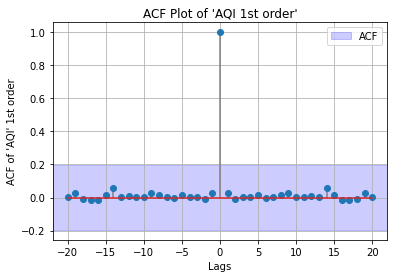

In [34]:

y1 = y.diff()
lags=20

# acf3 = helper.auto_correlation_cal(y1, lags)

acf3 = acf(y1[1:], nlags=lags)
plt.stem(np.arange(-lags, lags+1 ), np.hstack(((acf3[::-1])[:-1],acf3)), linefmt='grey', markerfmt='o')
m = 1.96 / np.sqrt(100)
plt.axhspan(-m, m, alpha=.2, color='blue')
plt.title("ACF Plot of 'AQI 1st order'")
plt.xlabel("Lags")
plt.ylabel("ACF of 'AQI' 1st order")
plt.grid()
plt.legend(["ACF"], loc='upper right')
plt.show()



In [35]:
# ADF test of 1st order differencing
helper.ADF_Cal(y1[1:])

print('\n')

# KPSS test of 1st order differencing
helper.kpss_test(y1[1:])

ADF Statistic: -14.862737
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Results of KPSS Test:
Test Statistic           0.068043
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test Statistic           0.068043
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

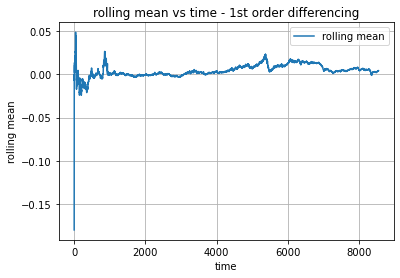

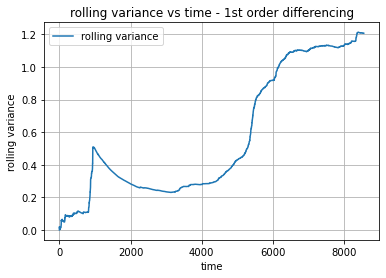

In [36]:
# rolling average of 1st order differencing
rol_m1 = helper.rolling_mean(y1[1:])

plt.plot(rol_m1, label='rolling mean')
plt.title("rolling mean vs time - 1st order differencing")
plt.xlabel("time")
plt.ylabel("rolling mean")
plt.legend()
plt.grid()
plt.show()

# rolling variance of 1st order differencing
rol_v1 = helper.rolling_variance(y1[1:])

plt.plot(rol_v1, label='rolling variance')
plt.title("rolling variance vs time - 1st order differencing")
plt.xlabel("time")
plt.ylabel("rolling variance")
plt.legend()
plt.grid()
plt.show()


# ============= Time Series Decomposition ===============

In [37]:

from statsmodels.tsa.seasonal import STL
STL=STL(y, period=12)
res = STL.fit()

st = res.seasonal
t = res.trend
rt = res.resid

Ft=1-(np.var(rt)/np.var(t+rt))
print(f'The strength of trend of the raw data is {Ft}')

Fs=1-(np.var(rt)/np.var(st+rt))
print(f'The strength of seasonality of the raw data is {Fs}')


The strength of trend of the raw data is 0.9991607389513714
The strength of seasonality of the raw data is 0.33651831310660585


# ==================== Train Test split =======================

In [38]:


yt,yf = train_test_split(y,shuffle=False,test_size=0.1,random_state=0)
yt1,yf1 = train_test_split(y1[1:],shuffle=False,test_size=0.1,random_state=0)
dtrain,dtest = train_test_split(time,shuffle=False,test_size=0.1,random_state=0)


# ================== Holt Winter Method ======================

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


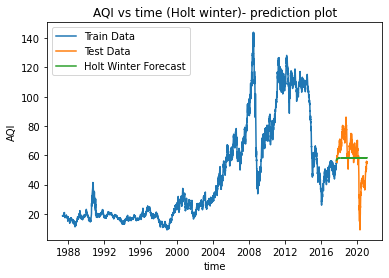

In [39]:


holtt=ets.ExponentialSmoothing(yt,trend='mul',damped_trend=True,seasonal='mul',seasonal_periods=12).fit()
holtf=holtt.forecast(steps=len(yf))
holtf=pd.DataFrame(holtf).set_index(yf.index)

plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf, label='Test Data')
plt.plot(dtest,holtf.values.flatten(), label='Holt Winter Forecast')
plt.title('AQI vs time (Holt winter)- prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# ===================== Base-Models ======================

# ==================== average method =====================

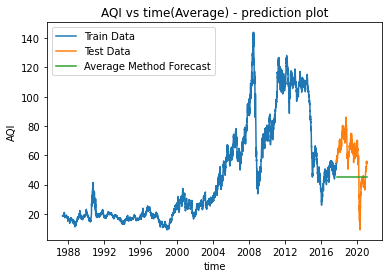

In [40]:



df1 = pd.DataFrame()
y_hat=[]
for i in range(len(yt)):
    if i==0:
        y_hat.append(np.nan)
    else:
        y_hat.append(round((pd.Series(yt)).head(i).mean(),3))

df1['yt']=yt
df1['average']=y_hat

y_avg_pred = []
for j in yf.index:
    y_avg_pred.append(round(df1['yt'].mean(),3))

y_avg_pred = pd.Series(y_avg_pred,index=yf.index)

plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf, label='Test Data')
plt.plot(dtest,y_avg_pred, label='Average Method Forecast')
plt.title('AQI vs time(Average) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# ================== naive method ===================

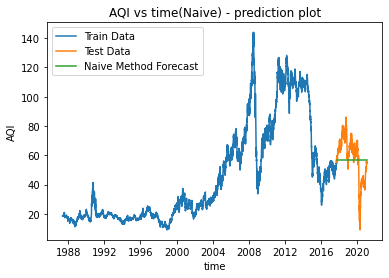

In [41]:

# ================================= naive method =================================

y_hat1=[]
for i in range(len(df1)):
    if i==0:
        y_hat1.append(np.nan)
    else:
        y_hat1.append(df1.loc[i-1,'yt'])

df1['naive']=y_hat1

y_naive_pred = []
for j in yf.index:
    y_naive_pred.append(round(df1.loc[len(df1)-1,'yt']))

y_naive_pred = pd.Series(y_naive_pred,index=yf.index)

plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf, label='Test Data')
plt.plot(dtest,y_naive_pred, label='Naive Method Forecast')
plt.title('AQI vs time(Naive) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# ==================== drift method  =====================

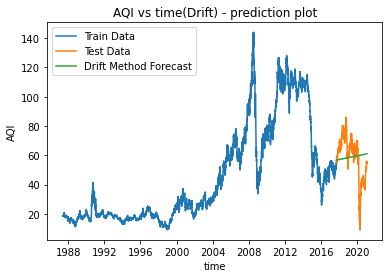

In [42]:

#  ================================= drift method  =================================

y_hat2=[]
for i in range(len(df1)):
    if i<=1:
        y_hat2.append(np.nan)
    else:
        y_hat2.append(df1.loc[i-1,'yt']+1*((df1.loc[i-1,'yt']-df1.loc[0,'yt'])/((df1.index[i-1]+1)-1) ))

df1['drift']=y_hat2

y_drift_pred = []
h=1
for i in range(len(yf)):
    y_drift_pred.append(df1.loc[len(df1)-1,'yt']+h*((df1.loc[len(df1)-1,'yt']-df1.loc[0,'yt'])/(len(df1)-1) ))
    h+=1

y_drift_pred = pd.Series(y_drift_pred,index=yf.index)

plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf, label='Test Data')
plt.plot(dtest,y_drift_pred, label='Drift Method Forecast')
plt.title('AQI vs time(Drift) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# ================= SES method  ====================

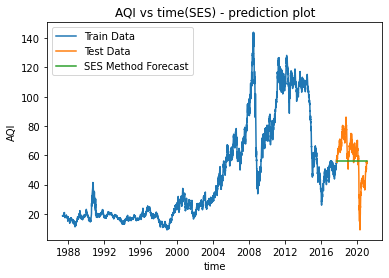

In [43]:

#  ================================= SES method  =================================

y_hat3=[]
alpha=0.5
for i in range(len(df1)):
    if i==0:
        y_hat3.append(np.nan)
    elif i==1:
        y_hat3.append(alpha*df1.loc[i-1,'yt']+(1-alpha)*df1.loc[0,'yt']) # since initial condition is 1st sample
    else:
        y_hat3.append(alpha*df1.loc[i-1,'yt']+(1-alpha)*y_hat3[i-1])

df1['ses']=y_hat3

y_ses_pred = []

for i in range(len(yf)):
    y_ses_pred.append(alpha*df1.loc[len(df1)-1,'yt']+(1-alpha)*y_hat3[-1])

y_ses_pred = pd.Series(y_ses_pred,index=yf.index)

plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf, label='Test Data')
plt.plot(dtest,y_ses_pred, label='SES Method Forecast')
plt.title('AQI vs time(SES) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# ============== ==== ARMA Process  ======================

# ================= ARMA (1,0) model ======================

========================= ARMA (1,0) model =================================


/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


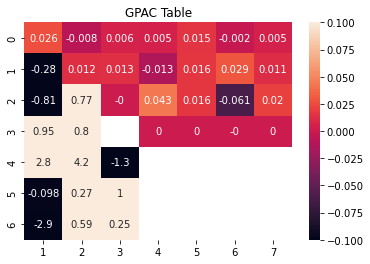

In [44]:

#  ================================= ARMA Process  =================================

print('========================= ARMA (1,0) model =================================')

acf_y2 = acf(y1[1:],100)
helper.Cal_GPAC(acf_y2,7,7)


/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was p

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 7697
Model:                     ARMA(1, 0)   Log Likelihood              -11370.045
Method:                       css-mle   S.D. of innovations              1.060
Date:                Sat, 12 Mar 2022   AIC                          22744.090
Time:                        01:15:25   BIC                          22757.987
Sample:                             0   HQIC                         22748.856
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Price     0.0337      0.011      2.957      0.003       0.011       0.056
                                    Roots                                    
                  Real          Imaginary         

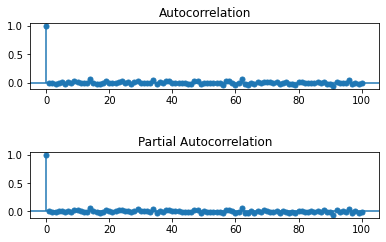

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


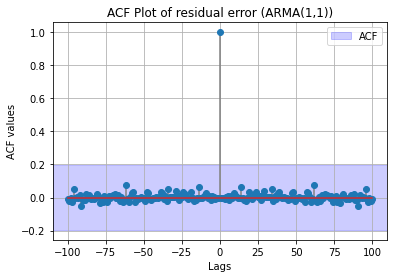

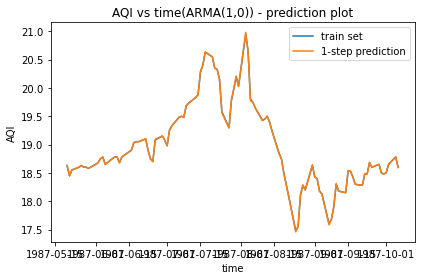

In [45]:

na = 1
nb = 0

model = sm.tsa.ARMA(yt1,(na,nb)).fit(trend='nc',disp=0)
print(model.summary())

for i in range(na):
    print(f'The AR Coefficient : a{i+1} is:, {model.params[i]}')

for i in range(nb):
    print(f'The MA Coefficient : b{i+1} is:, {model.params[i+na]}')

# =========== 1 step prediction ================
def inverse_diff(y20,z_hat,interval=1):
    y_new = np.zeros(len(y20))
    for i in range(1,len(z_hat)):
        y_new[i] = z_hat[i-interval] + y20[i-interval]
    y_new = y_new[1:]
    return y_new

model_hat = model.predict(start=0,end=len(yt1)-1)

# res_arma_error = np.array(yt) - np.array(model_hat)

y_hat = helper.inverse_diff(y[:len(yt1)].values,np.array(model_hat),1)

res_arma_error = y[1:len(yt1)] - y_hat

lags=100

helper.ACF_PACF_Plot(res_arma_error,lags,'residual error (ARMA(1,0))')
# acf_res = helper.auto_correlation_cal(res_arma_error, lags)
acf_res = acf(res_arma_error, nlags= lags)
plt.stem(np.arange(-lags, lags+1 ), np.hstack(((acf_res[::-1])[:-1],acf_res)), linefmt='grey', markerfmt='o')
m = 1.96 / np.sqrt(100)
plt.axhspan(-m, m, alpha=.2, color='blue')
plt.title("ACF Plot of residual error (ARMA(1,1))")
plt.xlabel("Lags")
plt.ylabel("ACF values")
plt.grid()
plt.legend(["ACF"], loc='upper right')
plt.show()


plt.plot(time[:99],y[:99], label = 'train set')
plt.plot(time[:99],y_hat[:99], label = '1-step prediction')
plt.title('AQI vs time(ARMA(1,0)) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.tight_layout()
plt.show()


confidence intervals of estimated parameters:                     0         1
ar.L1.Price  0.011355  0.056011
zero/cancellation:
zeros : []
poles : [-0.03368308784349249]
Chi Squared test results
The residuals is white, chi squared value :0.593529578688263


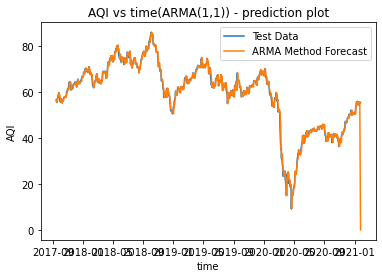

variance of residual error : 1.1235234959378981
variance of forecast error : 5.527788211790573


In [46]:

# diagnostic testing
from scipy.stats import chi2

print('confidence intervals of estimated parameters:',model.conf_int())

poles = []
for i in range(na):
    poles.append(-(model.params[i]))

print('zero/cancellation:')
zeros = []
for i in range(nb):
    zeros.append(-(model.params[i+na]))

print(f'zeros : {zeros}')
print(f'poles : {poles}')

Q = len(yt)*np.sum(np.square(acf_res[lags:]))

DOF = lags-na-nb

alfa = 0.01

chi_critical = chi2.ppf(1-alfa, DOF)

print('Chi Squared test results')

if Q<chi_critical:
    print(f'The residuals is white, chi squared value :{Q}')
else:
    print(f'The residual is NOT white, chi squared value :{Q}')

# =========== h step prediction ================
forecast = model.forecast(steps=len(yf1))

y_arma_pred = pd.Series(forecast[0], index=yf1.index)

y_hat_fore = inverse_diff(y[len(yt1):].values,np.array(y_arma_pred),1)

# h step prediction

plt.plot(dtest,y[len(yt1)+1:].values.flatten(), label='Test Data')
plt.plot(dtest,y_hat_fore, label='ARMA Method Forecast')
plt.title('AQI vs time(ARMA(1,1)) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()

res_arma_forecast = y[len(yt1)+1:] - y_hat_fore

print(f'variance of residual error : {np.var(res_arma_error)}')

print(f'variance of forecast error : {np.var(res_arma_forecast)}')


# ================== ARMA (3,3) model ===================

In [47]:
print('========================= ARMA (3,3) model =================================')

na = 3
nb = 3

model1 = sm.tsa.ARMA(yt1,(na,nb)).fit(trend='nc',disp=0)
print(model1.summary())

for i in range(na):
    print(f'The AR Coefficient : a{i+1} is:, {model1.params[i]}')

for i in range(nb):
    print(f'The MA Coefficient : b{i+1} is:, {model1.params[i+na]}')



========================= ARMA (3,3) model =================================


/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was p

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 7697
Model:                     ARMA(3, 3)   Log Likelihood              -11362.845
Method:                       css-mle   S.D. of innovations              1.059
Date:                Sat, 12 Mar 2022   AIC                          22739.690
Time:                        01:15:28   BIC                          22788.330
Sample:                             0   HQIC                         22756.371
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Price     0.0370      0.020      1.857      0.063      -0.002       0.076
ar.L2.Price    -0.0650      0.015     -4.254      0.000      -0.095      -0.035
ar.L3.Price     0.9480      0.017     56.093    

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


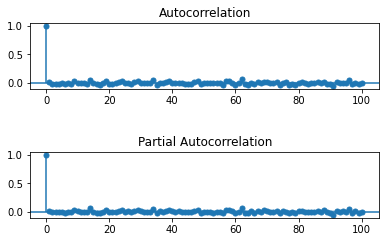

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


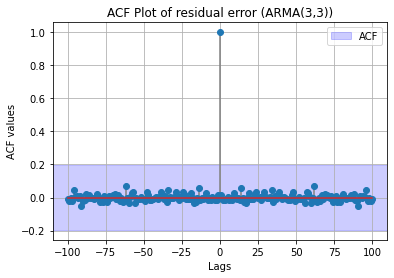

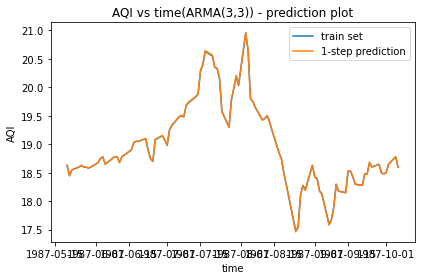

confidence intervals of estimated parameters:                     0         1
ar.L1.Price -0.002058  0.076132
ar.L2.Price -0.094968 -0.035064
ar.L3.Price  0.914895  0.981144
ma.L1.Price -0.058367  0.014742
ma.L2.Price  0.045760  0.104055
ma.L3.Price -0.979970 -0.915181
zero/cancellation:
zeros : [0.021812425102431865, -0.07490793507060944, 0.9475753857795951]
poles : [-0.037036874698322064, 0.06501605304890198, -0.9480193076778164]
Chi Squared test results
The residuals is white, chi squared value :0.3495059143105278


In [48]:

#================= 1 step prediction =====================
model_hat1 = model1.predict(start=0,end=len(yt1)-1)

# res_arma_error = np.array(yt) - np.array(model_hat)

y_hat1 = helper.inverse_diff(y[:len(yt1)].values,np.array(model_hat1),1)

res_arma_error1 = y[1:len(yt1)] - y_hat1

lags=100


helper.ACF_PACF_Plot(res_arma_error1,lags,'ARMA(3, 3) residual error')
# acf_res = helper.auto_correlation_cal(res_arma_error, lags)
acf_res = acf(res_arma_error1, nlags= lags)
plt.stem(np.arange(-lags, lags+1 ), np.hstack(((acf_res[::-1])[:-1],acf_res)), linefmt='grey', markerfmt='o')
m = 1.96 / np.sqrt(100)
plt.axhspan(-m, m, alpha=.2, color='blue')
plt.title("ACF Plot of residual error (ARMA(3,3))")
plt.xlabel("Lags")
plt.ylabel("ACF values")
plt.grid()
plt.legend(["ACF"], loc='upper right')
plt.show()


plt.plot(time[:99],y[:99], label = 'train set')
plt.plot(time[:99],y_hat1[:99], label = '1-step prediction')
plt.title('AQI vs time(ARMA(3,3)) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.tight_layout()
plt.show()

# diagnostic testing
from scipy.stats import chi2

print('confidence intervals of estimated parameters:',model1.conf_int())

poles = []
for i in range(na):
    poles.append(-(model1.params[i]))

print('zero/cancellation:')
zeros = []
for i in range(nb):
    zeros.append(-(model1.params[i+na]))

print(f'zeros : {zeros}')
print(f'poles : {poles}')

Q = len(yt1)*np.sum(np.square(acf_res[lags:]))

DOF = lags-na-nb

alfa = 0.01

chi_critical = chi2.ppf(1-alfa, DOF)

print('Chi Squared test results')

if Q<chi_critical:
    print(f'The residuals is white, chi squared value :{Q}')
else:
    print(f'The residual is NOT white, chi squared value :{Q}')


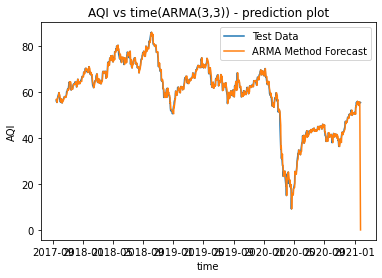

variance of residual error : 1.1214160067023784
variance of forecast error : 5.527805923724275


In [49]:

# =========== h step prediction ================

forecast1 = model1.forecast(steps=len(yf1))

y_arma_pred1 = pd.Series(forecast1[0], index=yf1.index)

y_hat_fore1 = inverse_diff(y[len(yt1):].values,np.array(y_arma_pred1),1)

# h step prediction

plt.plot(dtest,y[len(yt1)+1:].values.flatten(), label='Test Data')
plt.plot(dtest,y_hat_fore1, label='ARMA Method Forecast')
plt.title('AQI vs time(ARMA(3,3)) - prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.show()

res_arma_forecast1 = y[len(yt1)+1:] - y_hat_fore1

print(f'variance of residual error : {np.var(res_arma_error1)}')

print(f'variance of forecast error : {np.var(res_arma_forecast1)}')


# ============== ARIMA (1,1,0) model: ===================

========================= ARIMA (1,1,0) model =================================
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47719D+00    |proj g|=  2.14495D-05

At iterate    5    f=  1.47719D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   2.220D-08   1.477D+00
  F =   1.4771945377422580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results    

/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
/Users/pranay_yanarp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning

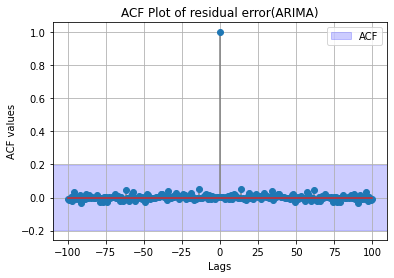

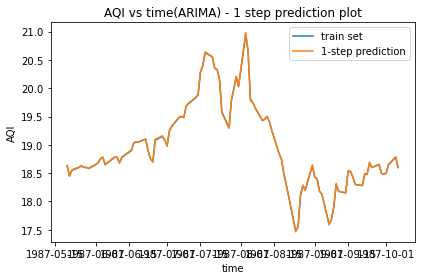

confidence intervals of estimated parameters:                       0         1
const         -0.019547  0.029464
ar.L1.D.Price  0.011334  0.055991
Chi Squared test results
The residuals is white, chi squared value :0.6307279997945305


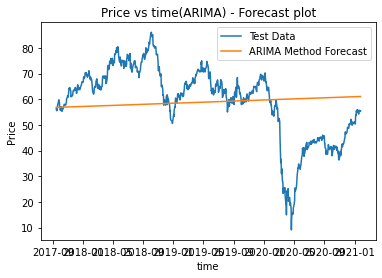

variance of residual error : 1.5418908395657887
variance of forecast error : 203.09811152057665


In [50]:

print('========================= ARIMA (1,1,0) model =================================')

na = 1
d=1
nb = 0

# yt,yf=train_test_split(y, shuffle=False, test_size=0.2)

model2 = sm.tsa.ARIMA(endog=yt,order=(na,d,nb)).fit()
print(model2.summary())
for i in range(na):
    print(f'The AR Coefficient : a{i+1} is:, {model2.params[i]}')

for i in range(nb):
    print(f'The MA Coefficient : b{i+1} is:, {model2.params[i+na]}')

print('confidence intervals of estimated parameters:',model2.conf_int())


# ================== 1 step prediction ========================
model_hat2 = model2.predict(start=1,end=len(yt)-1)

y_hat3 = inverse_diff(y[:len(yt)].values,np.array(model_hat2),1)

res_arima_error = y[1:len(yt)] - y_hat3

lags=100

acf_res = acf(res_arima_error, nlags=lags)

plt.stem(np.arange(-lags, lags+1), np.hstack(((acf_res[::-1])[:-1],acf_res)), linefmt='grey', markerfmt='o')
m = 1.96 / np.sqrt(100)
plt.axhspan(-m, m, alpha=.2, color='blue')
plt.title("ACF Plot of residual error(ARIMA)")
plt.xlabel("Lags")
plt.ylabel("ACF values")
plt.grid()
plt.legend(["ACF"], loc='upper right')
plt.show()

plt.plot(time[:99],y[:99], label = 'train set')
plt.plot(time[:99],y_hat3[:99], label = '1-step prediction')
plt.title('AQI vs time(ARIMA) - 1 step prediction plot')
plt.xlabel('time')
plt.ylabel('AQI')
plt.legend()
plt.tight_layout()
plt.show()

# diagnostic testing
from scipy.stats import chi2

print('confidence intervals of estimated parameters:',model2.conf_int())

Q = len(yt)*np.sum(np.square(acf_res[lags:]))

DOF = lags-na-nb

alfa = 0.01

chi_critical = chi2.ppf(1-alfa, DOF)

print('Chi Squared test results')

if Q<chi_critical:
    print(f'The residuals is white, chi squared value :{Q}')
else:
    print(f'The residual is NOT white, chi squared value :{Q}')

# ================== h step prediction ========================
forecast2 = model2.forecast(steps=len(yf))

y_arima_pred = pd.Series(forecast2[0], index=yf.index)

# plt.plot(dtrain,yt, label='Train Data')
plt.plot(dtest,yf.values.flatten(), label='Test Data')
plt.plot(dtest,y_arima_pred.values.flatten(), label='ARIMA Method Forecast')
plt.title('Price vs time(ARIMA) - Forecast plot')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()

res_arima_forecast = np.array(yf) - forecast[0]

print(f'variance of residual error : {np.var(res_arima_error)}')

print(f'variance of forecast error : {np.var(res_arima_forecast)}')



# We can observe that ARMA(1,0) model is far better than all the base models. So using ARMA(1,0) model is better option than using the base models

# We can observe that the ARIMA model gives bad forecast, so we can use the ARMA(1,0) model. ARMA(3,3) model gives the same output as ARMA(1,0) model so it is better to use ARMA(1,0) model since it is less expensive model.